In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import plotly.express as px
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import warnings
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import NearestNeighbors

In [4]:
df = pd.read_csv('customer_purchase_data.csv')
df.head()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.267939,8,0,30.568601,0,5,1
1,20,1,23579.773583,4,2,38.240097,0,5,0
2,27,1,127821.306432,11,2,31.633212,1,0,1
3,24,1,137798.623120,19,3,46.167059,0,4,1
4,31,1,99300.964220,19,1,19.823592,0,0,1


In [5]:
#EDA
df.PurchaseStatus.value_counts()

PurchaseStatus
0    852
1    648
Name: count, dtype: int64

In [6]:
df.dtypes

Age                     int64
Gender                  int64
AnnualIncome          float64
NumberOfPurchases       int64
ProductCategory         int64
TimeSpentOnWebsite    float64
LoyaltyProgram          int64
DiscountsAvailed        int64
PurchaseStatus          int64
dtype: object

In [7]:
df.isnull().sum()

Age                   0
Gender                0
AnnualIncome          0
NumberOfPurchases     0
ProductCategory       0
TimeSpentOnWebsite    0
LoyaltyProgram        0
DiscountsAvailed      0
PurchaseStatus        0
dtype: int64

In [8]:
df.duplicated().sum()

112

In [9]:
df.drop_duplicates()
df.dtypes

Age                     int64
Gender                  int64
AnnualIncome          float64
NumberOfPurchases       int64
ProductCategory         int64
TimeSpentOnWebsite    float64
LoyaltyProgram          int64
DiscountsAvailed        int64
PurchaseStatus          int64
dtype: object

In [17]:
Q1 = df['AnnualIncome'].quantile(0.25)
Q3 = df['AnnualIncome'].quantile(0.75)
IQR = Q3-Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound)
print(upper_bound)

Outliers_AnnualIncome = df[(df['AnnualIncome']<lower_bound) | (df['AnnualIncome']>upper_bound)]
if Outliers_AnnualIncome.empty:
    print("ไม่เจอข้อมูลนอกเกณฑ์ในสดมภ์ AnnualIncome")
else:
    print(Outliers_AnnualIncome['AnnualIncome'])

-43179.2113978119
213375.9634107995
ไม่เจอข้อมูลนอกเกณฑ์ในสดมภ์ AnnualIncome


In [19]:
Q1 = df['NumberOfPurchases'].quantile(0.25)
Q3 = df['NumberOfPurchases'].quantile(0.75)
IQR = Q3-Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound)
print(upper_bound)

Outliers_NumberOfPurchases = df[(df['NumberOfPurchases']<lower_bound) | (df['NumberOfPurchases']>upper_bound)]
if Outliers_NumberOfPurchases.empty:
    print("ไม่เจอข้อมูลนอกเกณฑ์ในสดมภ์ NumberOfPurchases")
else:
    print(Outliers_NumberOfPurchases['NumberOfPurchases'])

-10.0
30.0
ไม่เจอข้อมูลนอกเกณฑ์ในสดมภ์ NumberOfPurchases


In [21]:
Q1 = df['TimeSpentOnWebsite'].quantile(0.25)
Q3 = df['TimeSpentOnWebsite'].quantile(0.75)
IQR = Q3-Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound)
print(upper_bound)

Outliers_TimeSpentOnWebsite = df[(df['TimeSpentOnWebsite']<lower_bound) | (df['TimeSpentOnWebsite']>upper_bound)]
if Outliers_NumberOfPurchases.empty:
    print("ไม่เจอข้อมูลนอกเกณฑ์ในสดมภ์ TimeSpentOnWebsite")
else:
    print(Outliers_TimeSpentOnWebsite['TimeSpentOnWebsite'])

-26.16304342243758
86.68960611494387
ไม่เจอข้อมูลนอกเกณฑ์ในสดมภ์ TimeSpentOnWebsite


In [23]:
Q1 = df['DiscountsAvailed'].quantile(0.25)
Q3 = df['DiscountsAvailed'].quantile(0.75)
IQR = Q3-Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound)
print(upper_bound)

Outliers_DiscountsAvailed = df[(df['DiscountsAvailed']<lower_bound) | (df['DiscountsAvailed']>upper_bound)]
if Outliers_DiscountsAvailed.empty:
    print("ไม่เจอข้อมูลนอกเกณฑ์ในสดมภ์ DiscountsAvailed")
else:
    print(Outliers_DiscountsAvailed['DiscountsAvailed'])

-3.5
8.5
ไม่เจอข้อมูลนอกเกณฑ์ในสดมภ์ DiscountsAvailed


In [27]:
# X,Y Train test split
X = df.drop('PurchaseStatus',axis='columns')
y = testLabels = df.PurchaseStatus.astype(np.float32)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [29]:
y_train.value_counts()

PurchaseStatus
0.0    596
1.0    454
Name: count, dtype: int64

In [31]:
X_train.value_counts().sum()

1050

In [33]:
IR = 852/648
print("ค่า Imbalance Ratio มีค่า = ",IR)

ค่า Imbalance Ratio มีค่า =  1.3148148148148149


In [35]:
# ใช้ SMOTE เพื่อเพิ่มตัวอย่างในคลาสที่มีจำนวนน้อย
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [37]:
X_train_smote

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed
0,50,0,137836.868935,9,2,54.021394,0,1
1,38,1,129766.420756,14,1,41.529545,0,4
2,21,1,82574.739713,9,0,24.667730,0,0
3,29,1,38095.571175,14,3,49.689671,1,4
4,42,1,123123.975557,6,0,49.270589,0,1
...,...,...,...,...,...,...,...,...
1187,60,1,55150.958805,1,2,55.539410,0,4
1188,39,0,139554.988891,13,2,52.231182,0,0
1189,35,0,70162.406892,4,3,40.522250,1,1
1190,23,0,142736.989789,17,4,45.813298,0,4


In [59]:
X_test.shape

(450, 8)

In [39]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve
# Prepare function for model evaluation
def evaluate_model(model_name, y_val, y_pred, y_prob):
    # Print confusion matrix and classification report
    print("Confusion Matrix:")
    print(confusion_matrix(y_val, y_pred))
    
    print("\nClassification Report:")
    print(classification_report(y_val, y_pred))
    
    # Calculate metrics
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    auc = roc_auc_score(y_val, y_prob)
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"AUC: {auc:.4f}")
    
    # Plot ROC Curve
    fpr, tpr, _ = roc_curve(y_val, y_prob)
    plt.figure()
    plt.plot(fpr, tpr, label=f'{model_name} ROC curve (AUC = {auc:.4f})')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} ROC Curve')
    plt.legend(loc='lower right')
    plt.show()
    
    return accuracy, precision, recall, auc

Confusion Matrix:
[[224  32]
 [ 22 172]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.88      0.89       256
         1.0       0.84      0.89      0.86       194

    accuracy                           0.88       450
   macro avg       0.88      0.88      0.88       450
weighted avg       0.88      0.88      0.88       450

Accuracy: 0.8800
Precision: 0.8431
Recall: 0.8866
AUC: 0.9423


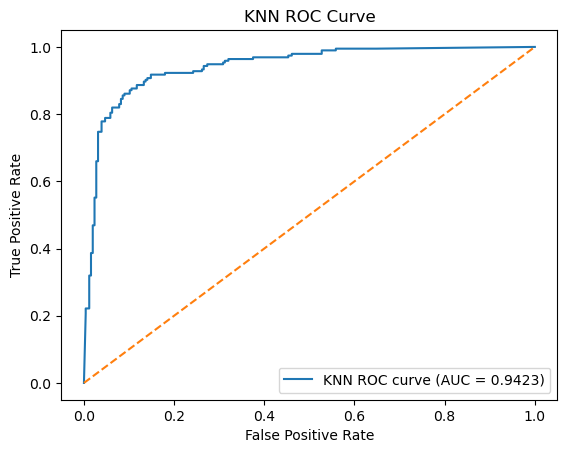

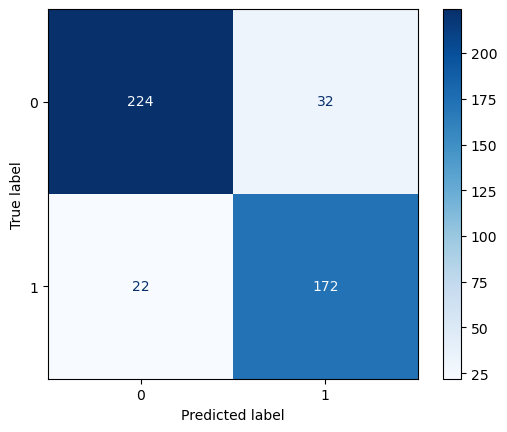

Best parameters found by GridSearchCV for KNN:
{'knn__metric': 'manhattan', 'knn__n_neighbors': 9, 'knn__weights': 'distance'}


In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
# Define the parameter grid for KNN
param_grid_knn = {
    'knn__n_neighbors': [3, 5, 7, 9,],       # Number of neighbors to use
    'knn__weights': ['uniform', 'distance'],  # Weight function used in prediction
    'knn__metric': ['euclidean', 'manhattan']  # Distance metric
}

# Create a pipeline to scale the data and apply KNN
pipeline = Pipeline([
    ('scaler', StandardScaler()),            # Step to scale the data
    ('knn', KNeighborsClassifier())          # KNeighborsClassifier model
])

# GridSearchCV with pipeline for KNN
grid_search_knn = GridSearchCV(pipeline, param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model with scaled data
grid_search_knn.fit(X_train_smote, y_train_smote)

# Predict and evaluate KNN
knn_best = grid_search_knn.best_estimator_
y_pred_knn = knn_best.predict(X_test)
y_prob_knn = knn_best.predict_proba(X_test)[:, 1]

# Print metrics (Assuming the same print_metrics function exists)
evaluate_model("KNN", y_test, y_pred_knn, y_prob_knn)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_knn)

# Create a ConfusionMatrixDisplay with a custom color map (cmap)
disp = ConfusionMatrixDisplay(conf_matrix)

# Plot the confusion matrix with a specific colormap, e.g., 'Blues'
disp.plot(cmap=plt.cm.Blues)

# Show the plot
plt.show()

# Print the best parameters for KNN
print("Best parameters found by GridSearchCV for KNN:")
print(grid_search_knn.best_params_)

Confusion Matrix:
[[220  36]
 [ 25 169]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.86      0.88       256
         1.0       0.82      0.87      0.85       194

    accuracy                           0.86       450
   macro avg       0.86      0.87      0.86       450
weighted avg       0.87      0.86      0.86       450

Accuracy: 0.8644
Precision: 0.8244
Recall: 0.8711
AUC: 0.9365


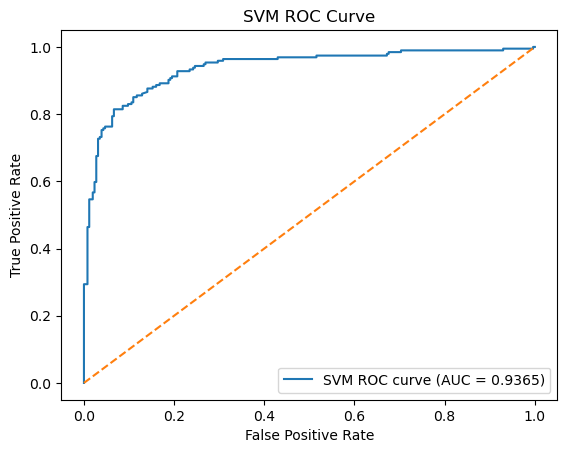

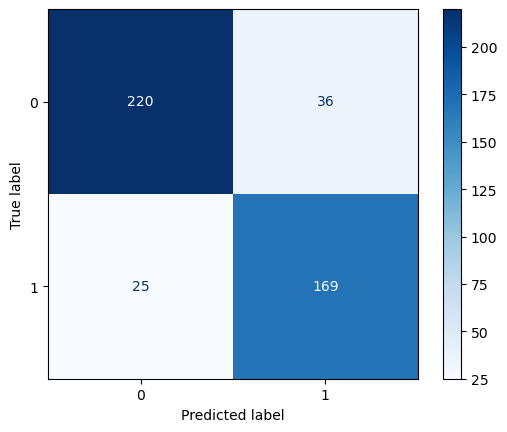

Best parameters found by GridSearchCV:
{'svc__C': 10, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}


In [42]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Define the parameter grid for SVM
param_grid_svm = {'svc__C': [0.1, 1, 10], 'svc__gamma': ['scale', 'auto'], 'svc__kernel': ['linear', 'rbf', 'poly', 'sigmoid']}

# Create a pipeline to scale the data and apply SVC
pipeline = Pipeline([
    ('scaler', StandardScaler()),   # Step to scale the data
    ('svc', SVC(probability=True))  # SVC model with probability=True
])

# GridSearchCV with pipeline
grid_search_svm = GridSearchCV(pipeline, param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model with scaled data
grid_search_svm.fit(X_train_smote, y_train_smote)

# Predict and evaluate SVM
svm_best = grid_search_svm.best_estimator_
y_pred_svm = svm_best.predict(X_test)
y_prob_svm = svm_best.predict_proba(X_test)[:, 1]

# Print metrics
evaluate_model("SVM", y_test, y_pred_svm, y_prob_svm)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_svm)

# Create a ConfusionMatrixDisplay with a custom color map (cmap)
disp = ConfusionMatrixDisplay(conf_matrix)

# Plot the confusion matrix with a specific colormap, e.g., 'Blues'
disp.plot(cmap=plt.cm.Blues)

# Show the plot
plt.show()

# Print the best parameters
print("Best parameters found by GridSearchCV:")
print(grid_search_svm.best_params_)

Confusion Matrix:
[[211  45]
 [ 25 169]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.82      0.86       256
         1.0       0.79      0.87      0.83       194

    accuracy                           0.84       450
   macro avg       0.84      0.85      0.84       450
weighted avg       0.85      0.84      0.85       450

Accuracy: 0.8444
Precision: 0.7897
Recall: 0.8711
AUC: 0.9179


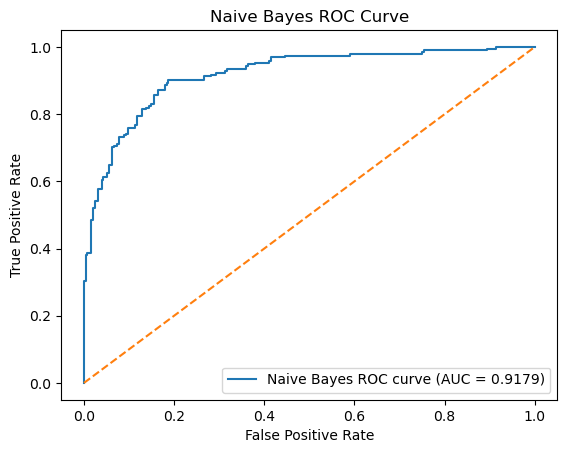

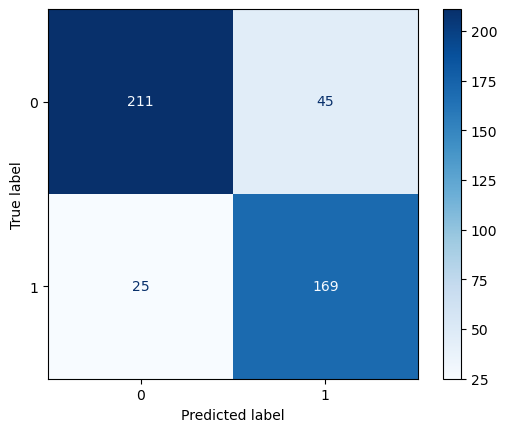

In [43]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Since GaussianNB does not have many hyperparameters to tune, we will just fit it in the pipeline
param_grid_nb = {}

# Create a pipeline to scale the data and apply GaussianNB
pipeline = Pipeline([
    ('scaler', StandardScaler()),   # Step to scale the data
    ('nb', GaussianNB())            # GaussianNB model
])

# GridSearchCV with pipeline (no parameter grid for Naive Bayes)
grid_search_nb = GridSearchCV(pipeline, param_grid_nb, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model with scaled data
grid_search_nb.fit(X_train_smote, y_train_smote)

# Predict and evaluate Naive Bayes
nb_best = grid_search_nb.best_estimator_
y_pred_nb = nb_best.predict(X_test)
y_prob_nb = nb_best.predict_proba(X_test)[:, 1]

# Print metrics (Assuming the same print_metrics function exists)
evaluate_model("Naive Bayes", y_test, y_pred_nb, y_prob_nb)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_nb)

# Create a ConfusionMatrixDisplay with a custom color map (cmap)
disp = ConfusionMatrixDisplay(conf_matrix)

# Plot the confusion matrix with a specific colormap, e.g., 'Blues'
disp.plot(cmap=plt.cm.Blues)

# Show the plot
plt.show()


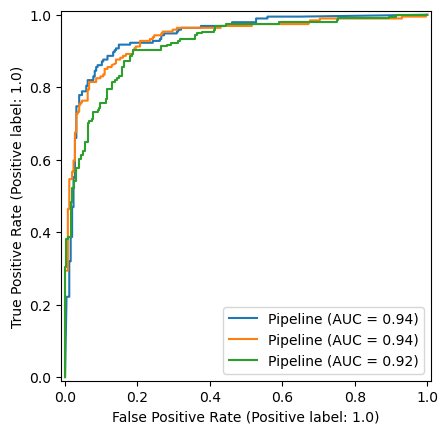

In [44]:
# ROC curve for all models
plt_roc = RocCurveDisplay.from_estimator(knn_best, X_test, y_test)
RocCurveDisplay.from_estimator(svm_best, X_test, y_test, ax=plt_roc.ax_)
RocCurveDisplay.from_estimator(nb_best, X_test, y_test, ax=plt_roc.ax_)
plt.show()